## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

In [2]:
import requests

def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

key = read_key("API.rtf")

In [3]:
def ndb_search(search):
    ''' Function will take in the name of a food and returns a list of all the items
    relating to that food from the USDA food composition data base. If that food is not found an
    an empty list will be returned'''
    
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
        "api_key": key,
        "q": search })
    result = response.json()
    if "list" in result:
        result = result["list"]
        result = result["item"]
    else:
        result = []
    return result
ndb_search("quail eggs")

[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Pro

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [4]:
import pandas as pd
dat = pd.read_csv("fresh.csv")
# Check to see which ones have a number
def check_for_num(food):
    ''' Function will return information on the raw food, but if nothing is found
    it will be an empty list '''
    
    x = ndb_search(food + ", raw")
    return x
num_foods = dat["food"].apply(check_for_num)

In [5]:
# Based off rows, that returned an empty list from above, search on website and replace the names 
dat["food"] = dat["food"].str.replace('kiwi', 'Kiwifruit')
dat["food"] = dat["food"].str.replace('collard_greens', 'collards')
dat["food"] = dat["food"].str.replace('green_beans', 'Beans, snap, green')
dat["food"] = dat["food"].str.replace('acorn_squash', 'Squash, winter, acorn')
dat["food"] = dat["food"].str.replace('summer_squash', 'Squash, summer, all varieties')
dat["food"] = dat["food"].str.replace('green_peppers', 'Peppers, sweet,  green')
dat["food"] = dat["food"].str.replace('red_peppers', 'Peppers, sweet, red')
dat["food"] = dat["food"].str.replace('butternut_squash', 'Squash, winter, butternut')
dat.iloc[26,5] = "peeled cucumbers"
dat.iloc[37,5] = "red cabbage"

In [6]:
def get_num(food):
    ''' Function will find the ndb number for each of the raw foods'''
    x = ndb_search(food + ", raw")
    x = pd.DataFrame(x)
    return x.loc[0,"ndbno"]

the_ndbno = pd.DataFrame(dat["food"].apply(get_num))

In [7]:
dat["NDBNO"] = the_ndbno
dat

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDBNO
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09221
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09201
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021


The first step was to make sure i can get all the ndb numbers for each of the foods in the fresh csv file. 
So since all the foods in that file are raw or unbranded i used the check_for_num function to see which raw foods 
information i can find in the USDA database. As expected, some raw foods did not have information. To fix this 
I went on the usda website to manually search for those unlisted raw foods. Turned out the name, or patter in the fresh csv file did not match pattern on usda website so i manually changed those names in the fresh csv file, so the pattern matches to that of the usda website which would then return me information on that raw food. Then once i knew i had information on all of the raw foods i used the get_num function to get info on a raw food and then extract the  ndb number. Also as you may have noticed all raw foods had a pattern of ", raw" on the usda website so i was able to use that pattern to search for the raw and unbrandded version of each food. 

__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

In [28]:
def ndb_report(num):
    ''' The function will take in a ndb number of a food and return a list of nutrients and information
    on those nutrients that are present within that food'''
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
        "api_key": key,
        "ndbno": num })
    result = response.json()["foods"]
    result = result[0]
    result = result["food"]
    result = result["nutrients"]
    return result

ndb_report("09279")


[{'nutrient_id': '255',
  'name': 'Water',
  'derivation': 'NONE',
  'group': 'Proximates',
  'unit': 'g',
  'value': '87.23',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '143.93'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '57.57'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '131.72'}]},
 {'nutrient_id': '208',
  'name': 'Energy',
  'derivation': 'NC',
  'group': 'Proximates',
  'unit': 'kcal',
  'value': '46',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '76'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '30'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '69'}]},
 {'nutrient_id': '203',
  'name': 'Protein',
  'derivation': 'NONE',
  'group': 'Proximates',


__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

## 1.41: Which Foods provide the most nutrients

In [29]:
def find_nut(num):
    x = ndb_report(num)
    return len(x)

In [30]:
dat["total nutrients"] = dat["NDBNO"].apply(find_nut)
dat

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDBNO,total nutrients
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326,33
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181,33
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09221,33
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316,33
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279,33
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09201,29
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302,33
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286,33
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266,33
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021,33


In [231]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 10]
import seaborn as sns

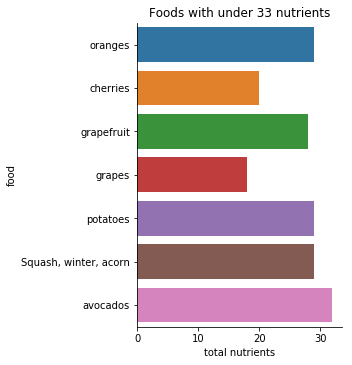

In [232]:
sub_dat = dat[dat["total nutrients"] < 33]
p1 = sns.catplot(x = "total nutrients", y = "food",
            kind = "bar", data = sub_dat);
p1.set(title = "Foods with under 33 nutrients")

The question that was being explored is which foods have the most nutrients. After looking at the amount of nutrients
in each of the foods, it appeared the maximum amount of nutrients was 33. Since a majority of the foods had 33 nutrients
it did not make sense to plot them all. Therefore, i rather plotted foods with under 33 nutrients. These foods as shown 
in the figure above were: oranges, cherries, grapefruits, grapes, potatoes, winter squash and avocados. 

Furthermore, it can be concluded that all foods besides the foods the ones on the graph are the ones with the most amount
of nutrients. Looking deeper into this, looking at the graph most of the foods listed on this graph are fruits. 
Also it is seen that all the vegetables on that list are really close to 33, but some of the fruits on the list are
significantly lower than 33. In conclusion, since we know that the rest of the foods have 33 nutrients, and since there is more
fruits than vegetables in the figure depicted above and the vegetables in the figure depicted above tend to be closer to 33 in 
contrast to fruits, it is safe to conclude that vegetables tend to carry a little more nutrients than fruits overall.

## 1.412 How do the price distributions compare among fruits and vegetables

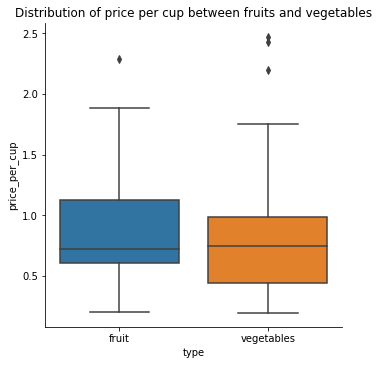

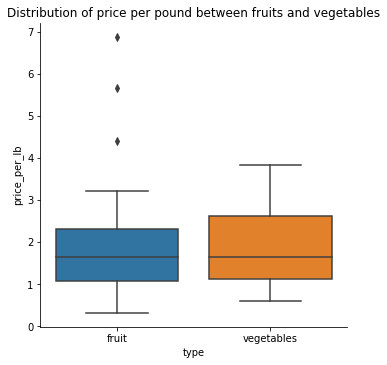

In [248]:
p2 = sns.catplot(x = "type", y = "price_per_cup",
            kind = "box", data = dat);
p3 = sns.catplot(x = "type", y = "price_per_lb",
            kind = "box", data=dat);
p2.set(title = "Distribution of price per cup between fruits and vegetables")
p3.set(title = "Distribution of price per pound between fruits and vegetables")


In [21]:
x = "43.5"
float(x)

43.5

In this question, I was particularly interestd in looking at the distribution of prices among fruits and vegetables. Since there were two metrics given i looked at both of them. First, looking at the price per cup among fruits and vegetbles, vegetables have a very slightly higher medain, than fruits. But looking at the overall distribution it is seen that vegetables will tend to have a lower price than fruits as the the 1st and third quartiles for vegetables are lower than fruits. Eventhough there seems to be 2 more outliers in vegetables than fruits, those 2 outliers arent significant enough to have that much impact. 

Next, I looked at the distribution of price per pound among fruits and vegetables. In this it seen that vegetables and fruits both have almost the same median price. But in contrast to price per cup vegetables tend to have a little more higher price as shown by the figure above. Again there are more outliers in fruits, but not significant enough to have an impact on the data.

In conclusion, based off these two distributions one can say if a person is buying cups of fruits and vegetables they will get a much better deal on vegetables than fruits as they are cheaper than fruits. But if one is buying pounds of fruits and vegetables, one would get a slightly better deal on fruits, because fruits are slightly cheaper than vegetables when paying per pound. 